## Model Training


### 1.1 Import Data and Reqhired Packages


#### Importing Pandas, Numpy, Matplptlib, Seaborn and Waenings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


## Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

## Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [6]:
X = df.drop(columns = ['math_score'], axis = 1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
def unique_values(dataframe):
    for i in dataframe.columns:
        print(f"For column '{i}' unique values are following: ")
        print(dataframe[i].unique())
        print()

In [9]:
unique_values(df)

For column 'gender' unique values are following: 
['female' 'male']

For column 'race_ethnicity' unique values are following: 
['group B' 'group C' 'group A' 'group D' 'group E']

For column 'parental_level_of_education' unique values are following: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

For column 'lunch' unique values are following: 
['standard' 'free/reduced']

For column 'test_preparation_course' unique values are following: 
['none' 'completed']

For column 'math_score' unique values are following: 
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

For column 'reading_score' unique values are following: 
[ 72  90  95  57  78  83  43 

In [10]:
Y = df['math_score']

In [11]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer =  StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]

)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [17]:
model_list = []
r2_list = []
for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, Y_train)
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2_square = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_square = evaluate_model(Y_test, Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training set')
    print(" - Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - R2 Score: {:.4f}".format(model_train_r2_square))
    
    print('----------------------------------')
    
    print('Model Performance for Test set')
    print(" - Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2_square))
    
    r2_list.append(model_test_r2_square)
    
    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training set
 - Root Mean Square Error: 5.3293
 - Mean Absolute Error: 4.2715
 - R2 Score: 0.8740
----------------------------------
Model Performance for Test set
 - Root Mean Square Error: 5.4252
 - Mean Absolute Error: 4.2222
 - R2 Score: 0.8790


Lasso
Model Performance for Training set
 - Root Mean Square Error: 6.5938
 - Mean Absolute Error: 5.2063
 - R2 Score: 0.8071
----------------------------------
Model Performance for Test set
 - Root Mean Square Error: 6.5197
 - Mean Absolute Error: 5.1579
 - R2 Score: 0.8253


Ridge
Model Performance for Training set
 - Root Mean Square Error: 5.3233
 - Mean Absolute Error: 4.2650
 - R2 Score: 0.8743
----------------------------------
Model Performance for Test set
 - Root Mean Square Error: 5.3904
 - Mean Absolute Error: 4.2111
 - R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Training set
 - Root Mean Square Error: 5.7079
 - Mean Absolute Error: 4.5168
 - R2 Score: 0.8555
---------

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by='R2_score', ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879046
8,AdaBoost Regressor,0.851675
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851622
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.760416


## Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(f" Accuracy of the model is {round(score,2)}")

 Accuracy of the model is 87.9


## Plot y_pred and y_test

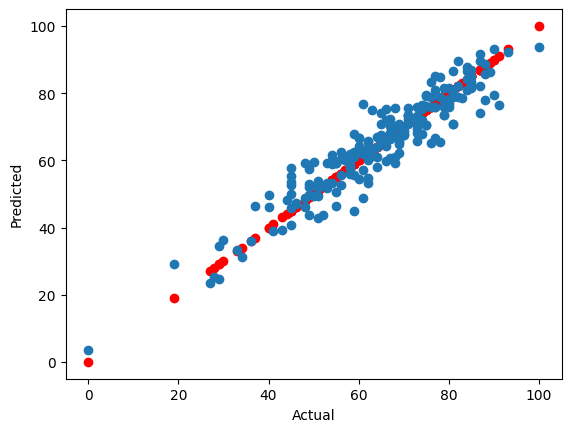

In [20]:
plt.scatter(Y_test, Y_test, color='red', label='Actual')
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

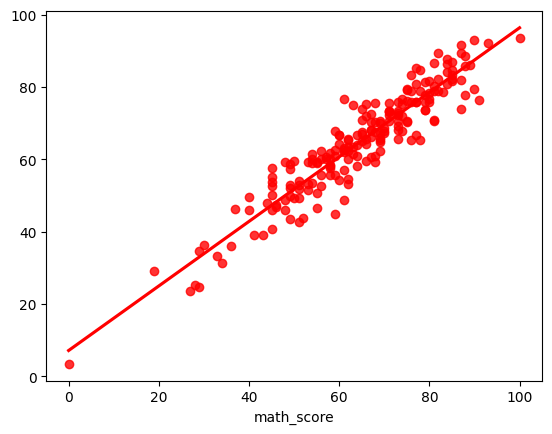

In [21]:
sns.regplot(x=Y_test,y=Y_pred,ci=None,color ='red')
plt.show()

## Difference Between Actual and Predicted Values

In [22]:
pd.DataFrame({'Actual Value' : Y_test, 'Predicted Value' : Y_pred, 'Difference' : (Y_test - Y_pred)})

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
